In [1]:
import numpy as np
import pandas as pd

In [2]:
class AlbumSimulator(object):
    
    def __init__(self,total,stickers_by_packet):
        
        self.total = total
        self.stickers_by_packet = stickers_by_packet
        
    def simulate(self,missing_limit=0):
        
        have = []
        repeats = []
        limit = self.total-missing_limit
        packets = 0
        
        while len(have) < limit:
            
            stickers = np.random.randint(1,self.total+1,self.stickers_by_packet)
            packets += 1
            for sticker in stickers:
                if sticker not in have:
                    have.append(sticker)
                else:
                    repeats.append(sticker)

        return sorted(have), sorted(repeats), packets
    
    def simulate_x(self,tries,missing_limit):
        
        data = {"repeats":[],
               "have":[],
               "packets":[]}
        
        for i in range(0,tries):
            
            h,r,p = self.simulate(missing_limit)
            
            data["have"].append(len(h))
            data["repeats"].append(len(r))
            data["packets"].append(p)
            
            
        return pd.DataFrame(data)
            
        

In [13]:
album = AlbumSimulator(384,5)

In [14]:
h, r, p = album.simulate(50)

In [15]:
print len(h)
print len(r)
print p

335
450
157


In [21]:
d = album.simulate_x(1000,0)

<IPython.core.display.Javascript object>


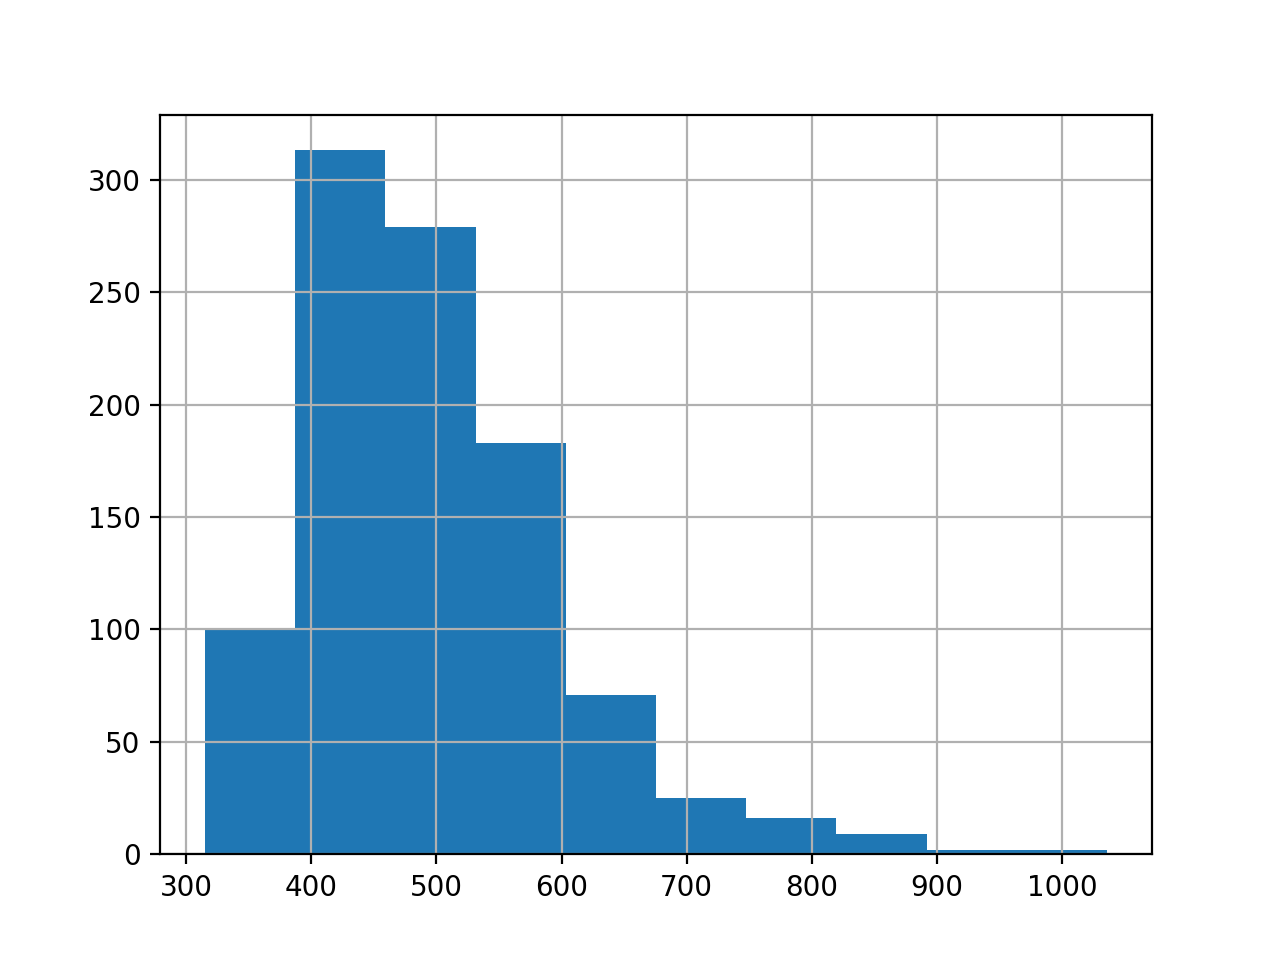

In [22]:
%matplotlib notebook
d["packets"].hist(bins=10)

380